In [1]:
%matplotlib inline                          

import numpy as np

import matplotlib.pyplot as plt 
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D3V"
R = [5,10,20]
model = "Full"         # Full - fully kinetic PIC; Hybrid - Hybrid PIC
step = [49100*2,49100*4,49100*8]
species = "p"     
# Usually only the electron temperature in fully kinetic PIC simulations is outputed
components = ["x","y"]

for i in range(len(R)):
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R[i])
    dat_files = ["{dat_dir}/velocity_{spec}_{component}_step{step:g}.dat".format( \
    dat_dir=dat_dir, spec=species, component=component, step=step[i]) for component in components]
    print("Loading data from {} ...".format(dat_files))   # Input velocity data 
    locals()['v_{}'.format(R[i])] = [np.genfromtxt(dat_file) for dat_file in dat_files] # 循环计数命名

    # Input num_den data
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R[i])
    dat_file = "{}/number_density_{}_step{s:g}.dat".format(dat_dir, species, s=step[i])  
    print("Loading data from [{}] ...".format(dat_file))
    locals()['n_{}'.format(R[i])] = np.genfromtxt(dat_file)

    # Input Temperature data
    species1 = "e"
    dat_files = ["{dat_dir}/temperature_{spec}_{component}_step{step:g}.dat".format( \
    dat_dir=dat_dir, spec=species1, component=component, step=step[i]) for component in components]
    print("Loading data from {} ...".format(dat_files))   # Input velocity data 
    locals()['t_{}'.format(R[i])] = [np.genfromtxt(dat_file) for dat_file in dat_files] # 循环计数命名

print("Loading data completed!")


Loading data from ['../../Data/Full/2D3V/R5/velocity_p_x_step98200.dat', '../../Data/Full/2D3V/R5/velocity_p_y_step98200.dat'] ...
Loading data from [../../Data/Full/2D3V/R5/number_density_p_step98200.dat] ...
Loading data from ['../../Data/Full/2D3V/R5/temperature_e_x_step98200.dat', '../../Data/Full/2D3V/R5/temperature_e_y_step98200.dat'] ...
Loading data from ['../../Data/Full/2D3V/R10/velocity_p_x_step196400.dat', '../../Data/Full/2D3V/R10/velocity_p_y_step196400.dat'] ...
Loading data from [../../Data/Full/2D3V/R10/number_density_p_step196400.dat] ...
Loading data from ['../../Data/Full/2D3V/R10/temperature_e_x_step196400.dat', '../../Data/Full/2D3V/R10/temperature_e_y_step196400.dat'] ...
Loading data from ['../../Data/Full/2D3V/R20/velocity_p_x_step392800.dat', '../../Data/Full/2D3V/R20/velocity_p_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D3V/R20/number_density_p_step392800.dat] ...
Loading data from ['../../Data/Full/2D3V/R20/temperature_e_x_step392800.dat', '.

In [2]:
ny, nx = v_5[0].shape
dx = 1; nx_show = [0, 720+1]
dy = 1; ny_show = [0, 240+1]
x = dx*np.arange(nx)
y = dy*np.arange(ny)
X, Y = np.meshgrid(x,y)
print(x)

[   0    1    2 ... 2046 2047 2048]


In [3]:
fontsize_label=20
fontsize_tick=16

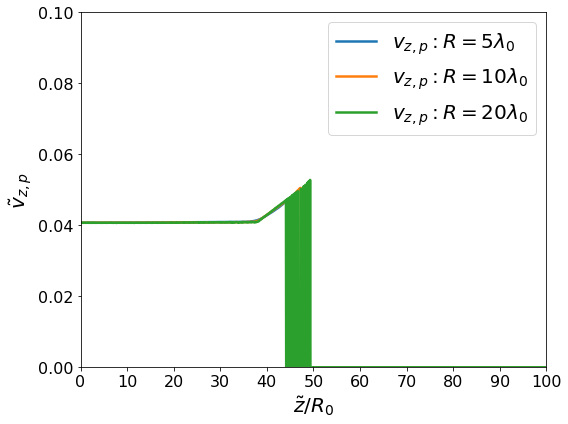

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
xnd = [x/5, x/10, x/20]
xend = 100
iy = 0

ax.plot(xnd[0], v_5[0][iy,:], "-", label="${v}_{z,p}:{R}=5{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[1], v_10[0][iy,:], "-", label="${v}_{z,p}:{R}=10{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[2], v_20[0][iy,:], "-", label="${v}_{z,p}:{R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim([0, xend])
ax.set_ylim([0, 0.1])
ax.set_xticks(np.arange(0, xend+1, 10))
ax.set_yticks(np.arange(0, 0.1+0.01, 0.02))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{v}_{z,p}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/Te_y_{dimension}".format(dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
#plt.savefig(img_name+".png", dpi=200)
plt.show()

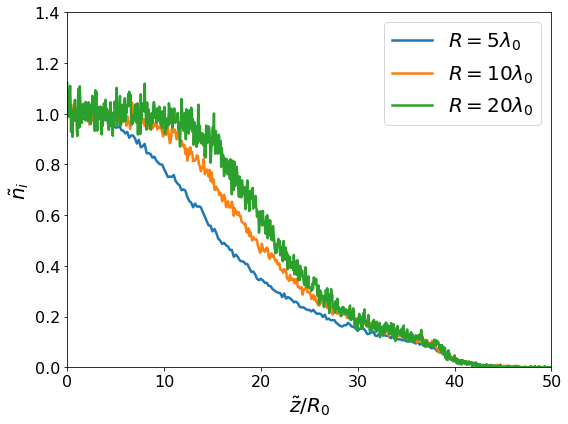

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
xnd=[x/5, x/10, x/20]
xend = 50
iy = 0

ax.plot(xnd[0], n_5[iy,:], "-", label="${R}=5{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[1], n_10[iy,:], "-", label="${R}=10{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[2], n_20[iy,:], "-", label="${R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim([0, xend])
ax.set_ylim([0, 0.1])
ax.set_xticks(np.arange(0, xend+1, 10))
ax.set_yticks(np.arange(0, 1.4+0.1, 0.2))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{n}_{i}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/self_sim_ni"
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()

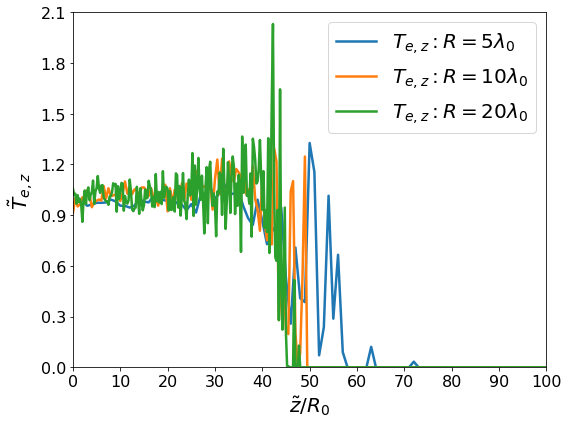

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
xnd=[x/5, x/10, x/20]
xend = 100
iy = 0
# idx = np.logical_and(vs5[0] >= 0.1, vs5[0] <= 0.9)

ax.plot(xnd[0][::5], t_5[0][iy,:][::5], "-", label="${T}_{e,z}:{R}=5{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[1][::5], t_10[0][iy,:][::5], "-", label="${T}_{e,z}:{R}=10{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[2][::5], t_20[0][iy,:][::5], "-", label="${T}_{e,z}:{R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim([0, xend])
ax.set_ylim([0, 2.0])
ax.set_xticks(np.arange(0, xend+1, 10))
ax.set_yticks(np.arange(0, 2.0+0.1, 0.3))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{T}_{e,z}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/Te_z_{dimension}".format(dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()

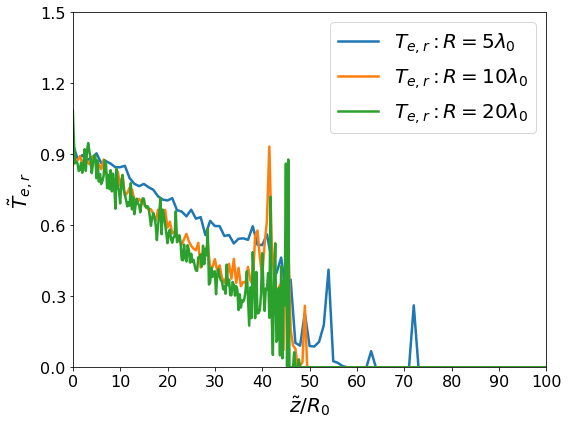

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
xnd=[x/5, x/10, x/20]
xend = 100
iy = 0
# idx = np.logical_and(vs5[0] >= 0.1, vs5[0] <= 0.9)

ax.plot(xnd[0][::5], t_5[1][iy,:][::5], "-", label="${T}_{e,r}:{R}=5{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[1][::5], t_10[1][iy,:][::5], "-", label="${T}_{e,r}:{R}=10{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[2][::5], t_20[1][iy,:][::5], "-", label="${T}_{e,r}:{R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim([0, xend])
ax.set_ylim([0, 1.5])
ax.set_xticks(np.arange(0, xend+1, 10))
ax.set_yticks(np.arange(0, 1.5+0.01, 0.3))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{T}_{e,r}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/Te_r_{dimension}".format(dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()